In [1]:
import numpy as np
import pandas as pd
recordsIn = pd.read_csv('Austin_Animal_Center_Intakes.csv', encoding='latin-1')
recordsOut = pd.read_csv('Austin_Animal_Center_Outcomes.csv', encoding='latin-1')

In [2]:
#look at Wildlife
recordsWildIn = recordsIn[recordsIn["Intake Type"] == 'Wildlife']

In [3]:
recordsWildIn.head()

,Unnamed: 0,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
23,23,A695601,NaN,01/18/2015 06:18:00 PM,01/18/2015 06:18:00 PM,2940 Eckert St in Austin (TX),Wildlife,Sick,Other,Unknown,6 months,Opossum Mix,Gray
53,53,A733763,NaN,08/26/2016 04:12:00 PM,08/26/2016 04:12:00 PM,609 W Lynn St #1 in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Raccoon Mix,Gray
65,65,A722486,NaN,03/17/2016 02:41:00 PM,03/17/2016 02:41:00 PM,Crownspoint Dr & Mosswood Cir in Austin (TX),Wildlife,Injured,Other,Unknown,1 year,Opossum Mix,Gray/White
81,81,A781329,NaN,09/27/2018 01:20:00 PM,09/27/2018 01:20:00 PM,9Th & Congress in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown
123,123,A786151,NaN,12/18/2018 09:24:00 AM,12/18/2018 09:24:00 AM,9100 Texas Sun in Austin (TX),Wildlife,Injured,Other,Unknown,2 years,Opossum Mix,Gray


In [4]:
import matplotlib.pyplot as plt
condtype = recordsWildIn['Intake Condition'].value_counts()
condtype.index.name = 'Intake Condition'
condtype.plot(kind='bar',rot=20, title='Intake Condition of Wildlife',figsize=(14,5), colormap = 'Paired');

In [5]:
#get rid of mix
breed = recordsWildIn
breed['Breed'] = recordsWildIn['Breed'].str.replace(' Mix', '')
breed.head()

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
23,23,A695601,NaN,01/18/2015 06:18:00 PM,01/18/2015 06:18:00 PM,2940 Eckert St in Austin (TX),Wildlife,Sick,Other,Unknown,6 months,Opossum,Gray
53,53,A733763,NaN,08/26/2016 04:12:00 PM,08/26/2016 04:12:00 PM,609 W Lynn St #1 in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Raccoon,Gray
65,65,A722486,NaN,03/17/2016 02:41:00 PM,03/17/2016 02:41:00 PM,Crownspoint Dr & Mosswood Cir in Austin (TX),Wildlife,Injured,Other,Unknown,1 year,Opossum,Gray/White
81,81,A781329,NaN,09/27/2018 01:20:00 PM,09/27/2018 01:20:00 PM,9Th & Congress in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat,Brown
123,123,A786151,NaN,12/18/2018 09:24:00 AM,12/18/2018 09:24:00 AM,9100 Texas Sun in Austin (TX),Wildlife,Injured,Other,Unknown,2 years,Opossum,Gray


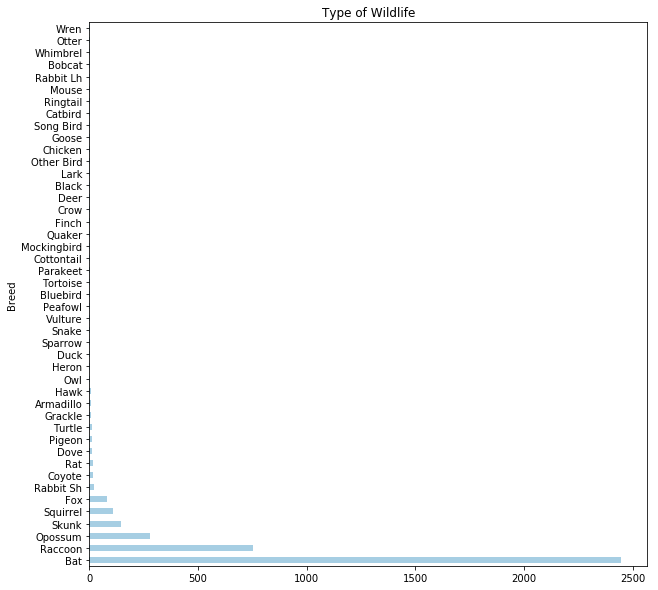

In [6]:
import matplotlib.pyplot as plt
breedtype = breed['Breed'].value_counts()
breedtype.index.name = 'Breed'
breedtype.plot(kind='barh',rot=0, title='Type of Wildlife',figsize=(10,10), colormap = 'Paired')


In [7]:
mergeWild = recordsWildIn.merge(recordsOut, on='Animal ID', how = 'inner', suffixes=('_In', '_Out'))


In [8]:
mergeWild.head()

,Unnamed: 0_In,Animal ID,Name_In,DateTime_In,MonthYear_In,Found Location,Intake Type,Intake Condition,Animal Type_In,Sex upon Intake,...,DateTime_Out,MonthYear_Out,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_Out,Sex upon Outcome,Age upon Outcome,Breed_Out,Color_Out
0,23,A695601,NaN,01/18/2015 06:18:00 PM,01/18/2015 06:18:00 PM,2940 Eckert St in Austin (TX),Wildlife,Sick,Other,Unknown,...,01/18/2015 06:33:00 PM,01/18/2015 06:33:00 PM,07/18/2014,Euthanasia,Medical,Other,Unknown,6 months,Opossum Mix,Gray
1,53,A733763,NaN,08/26/2016 04:12:00 PM,08/26/2016 04:12:00 PM,609 W Lynn St #1 in Austin (TX),Wildlife,Normal,Other,Unknown,...,08/28/2016 09:03:00 AM,08/28/2016 09:03:00 AM,08/26/2015,Euthanasia,Rabies Risk,Other,Unknown,1 year,Raccoon Mix,Gray
2,65,A722486,NaN,03/17/2016 02:41:00 PM,03/17/2016 02:41:00 PM,Crownspoint Dr & Mosswood Cir in Austin (TX),Wildlife,Injured,Other,Unknown,...,03/17/2016 03:01:00 PM,03/17/2016 03:01:00 PM,03/17/2015,Euthanasia,Suffering,Other,Unknown,1 year,Opossum Mix,Gray/White
3,81,A781329,NaN,09/27/2018 01:20:00 PM,09/27/2018 01:20:00 PM,9Th & Congress in Austin (TX),Wildlife,Normal,Other,Unknown,...,09/27/2018 03:00:00 PM,09/27/2018 03:00:00 PM,09/27/2017,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat Mix,Brown
4,123,A786151,NaN,12/18/2018 09:24:00 AM,12/18/2018 09:24:00 AM,9100 Texas Sun in Austin (TX),Wildlife,Injured,Other,Unknown,...,12/18/2018 11:05:00 AM,12/18/2018 11:05:00 AM,12/18/2016,Euthanasia,Rabies Risk,Other,Unknown,2 years,Opossum Mix,Gray


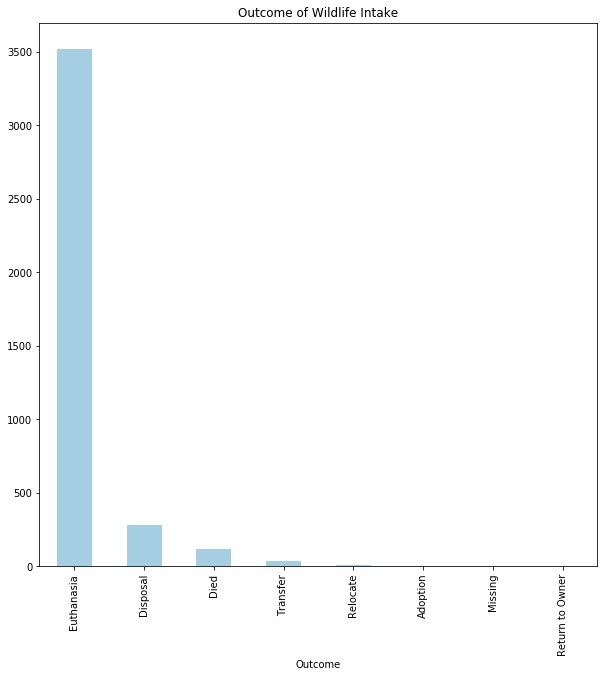

In [9]:
import matplotlib.pyplot as plt
outcometype = mergeWild['Outcome Type'].value_counts()
outcometype.index.name = 'Outcome'
outcometype.plot(kind='bar',rot=90, title='Outcome of Wildlife Intake',figsize=(10,10), colormap = 'Paired')

In [10]:
outcometype

Outcome
Euthanasia         3522
Disposal            281
Died                116
Transfer             38
Relocate             12
Adoption              5
Missing               2
Return to Owner       2
Name: Outcome Type, dtype: int64

In [12]:
breedtype = breed['Breed'].value_counts()

In [13]:
breedtype

Bat            2445
Raccoon         754
Opossum         279
Skunk           147
Squirrel        111
Fox              80
Rabbit Sh        22
Coyote           17
Rat              17
Dove             14
Pigeon           12
Turtle           11
Grackle          10
Armadillo         9
Hawk              6
Owl               5
Heron             4
Duck              4
Sparrow           4
Snake             3
Vulture           3
Peafowl           2
Bluebird          2
Tortoise          2
Parakeet          2
Cottontail        2
Mockingbird       2
Quaker            2
Finch             1
Crow              1
Deer              1
Black             1
Lark              1
Other Bird        1
Chicken           1
Goose             1
Song Bird         1
Catbird           1
Ringtail          1
Mouse             1
Rabbit Lh         1
Bobcat            1
Whimbrel          1
Otter             1
Wren              1
Name: Breed, dtype: int64